In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import urllib.request as request
import networkx as nx
from tqdm import tqdm
import cartopy.crs as ccrs

import pre_process_baci_1
from functions.nx_tools import whits

# printing
from IPython.display import Markdown, display
import pprint
def printmd(string):
    display(Markdown(string))

In [3]:
revised_country_names = {'FS Micronesia': 'Micronesia', 
                         'China, Macao SAR':'Macao', 
                         'Solomon Isds':'Solomon Islands', 
                         'Norfolk Isds':'Norfolk Island', 
                         "Dem. People's Rep. of Korea":'North Korea', 
                         'N. Mariana Isds':'Northern Mariana Islands', 
                         'Christmas Isds':'Christmas Island', 
                         'Turks and Caicos Isds':'Turks and Caicos Islands', 
                         'Rep. of Korea':'South Korea', 
                         'Cocos Isds':'Cocos Islands', 
                         'Falkland Isds (Malvinas)':'Falkland Islands', 
                         "Lao People's Dem. Rep.":'Laos', 
                         'Cayman Isds':'Cayman Islands', 
                         'Cook Isds':'Cook Islands', 
                         'Dem. Rep. of the Congo': 'Democratic Republic of the Congo', 
                         'Marshall Isds':'Marshall Islands', 
                         'Wallis and Futuna Isds':'Wallis and Futuna', 
                         'Rep. of Moldova':'Moldova', 
                         'Br. Virgin Isds':'British Virgin Islands', 
                         'China, Hong Kong SAR':'Hong Kong', 
                         'United Rep. of Tanzania':'Tanzania', 
                         'Central African Rep.':'Central African Republic'}

In [5]:
# pre_processed_datasets = pre_process_baci_1.pre_process_data('datasets/2019dataset')

  0%|          | 0/3 [00:00<?, ?it/s]

Start reading files...


 33%|███▎      | 1/3 [02:00<04:01, 120.99s/it]


IndexError: list index out of range

In [29]:
# # df_baci_2017 = pre_processed_datasets['Y2017']
# # df_baci_2018 = pre_processed_datasets['Y2018']
# df_baci_2019 = pre_processed_datasets['Y2019']
# df_baci_2019 = df_baci_2019[~(df_baci_2019=='Other Asia, nes')]
# df_baci_2019 = df_baci_2019.reset_index()
# df_baci_2019

,index,year,exporter,importer,hscode,value_kUSD,quantity_mtons,exporter_name,importer_name,exp_code,imp_code,hs_chap,section,hs_sec,exp_coord,imp_coord
0,0,2019,4,31,70310,5.744,22.000,Afghanistan,Azerbaijan,AFG,AZE,7,Vegetable products,2,"{'latitude': 33.7680065, 'longitude': 66.2385139}","{'latitude': 40.3936294, 'longitude': 47.7872508}"
1,1,2019,4,31,80211,2.425,0.196,Afghanistan,Azerbaijan,AFG,AZE,8,Vegetable products,2,"{'latitude': 33.7680065, 'longitude': 66.2385139}","{'latitude': 40.3936294, 'longitude': 47.7872508}"
2,2,2019,4,31,80620,0.177,0.028,Afghanistan,Azerbaijan,AFG,AZE,8,Vegetable products,2,"{'latitude': 33.7680065, 'longitude': 66.2385139}","{'latitude': 40.3936294, 'longitude': 47.7872508}"
3,3,2019,4,31,80711,5.856,37.830,Afghanistan,Azerbaijan,AFG,AZE,8,Vegetable products,2,"{'latitude': 33.7680065, 'longitude': 66.2385139}","{'latitude': 40.3936294, 'longitude': 47.7872508}"
4,4,2019,4,31,81310,0.113,0.014,Afghanistan,Azerbaijan,AFG,AZE,8,Vegetable products,2,"{'latitude': 33.7680065, 'longitude': 66.2385139}","{'latitude': 40.3936294, 'longitude': 47.7872508}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531931,10531931,2019,894,854,100510,0.191,0.040,Zambia,Burkina Faso,ZMB,BFA,10,Vegetable products,2,"{'latitude': -14.5189121, 'longitude': 27.5589...","{'latitude': 12.0753083, 'longitude': -1.6880314}"
10531932,10531932,2019,894,854,392510,52.570,7.000,Zambia,Burkina Faso,ZMB,BFA,39,"Plastics, rubber, articles thereof",7,"{'latitude': -14.5189121, 'longitude': 27.5589...","{'latitude': 12.0753083, 'longitude': -1.6880314}"
10531933,10531933,2019,894,854,722830,23.353,1.218,Zambia,Burkina Faso,ZMB,BFA,72,Base metals and articles of base metal,15,"{'latitude': -14.5189121, 'longitude': 27.5589...","{'latitude': 12.0753083, 'longitude': -1.6880314}"
10531934,10531934,2019,894,854,722880,20.259,2.887,Zambia,Burkina Faso,ZMB,BFA,72,Base metals and articles of base metal,15,"{'latitude': -14.5189121, 'longitude': 27.5589...","{'latitude': 12.0753083, 'longitude': -1.6880314}"


In [28]:
df_baci_2019

In [190]:
# # df_baci_2019.to_csv('/datasets/BACI_2019_preprocessed.csv')
# # df_baci_2018.to_csv('/datasets/BACI_2018_preprocessed.csv')
# df_baci_2019.to_csv('datasets/2019dataset/BACI_2019_preprocessed_2.csv')

In [6]:
df_baci_2019 = pd.read_csv('datasets/2019dataset/BACI_2019_preprocessed_2.csv')

In [7]:
df_baci_2019[df_baci_2019.imp_code.isnull()==True]
# {251.0:'FRA', 
#  381.0:'ITA', 
#  579.0:'NOR',
#  699.0:'IND',
#  757.0:'CHE',
#  842.0:'USA',
#  729.0:'SDN'}

# 'France'
# 'Italy'
# 'Norway'
# 'India'
# 'Switzerland'
# 'USA'
# 'Sudan'

,Unnamed: 0,Unnamed: 0.1,index,year,exporter,importer,hscode,value_kUSD,quantity_mtons,exporter_name,importer_name,exp_code,imp_code,hs_chap,section,hs_sec,exp_coord,imp_coord
2021,2021,2021,2021,2019,4,490,252610,19.219,200.000,Afghanistan,NaN,AFG,NaN,25,Mineral products,5,"{'latitude': 33.7680065, 'longitude': 66.2385139}",NaN
2022,2022,2022,2022,2019,4,490,261790,0.394,0.797,Afghanistan,NaN,AFG,NaN,26,Mineral products,5,"{'latitude': 33.7680065, 'longitude': 66.2385139}",NaN
2023,2023,2023,2023,2019,4,490,330290,0.097,0.004,Afghanistan,NaN,AFG,NaN,33,Products of the chemical or allied industries,6,"{'latitude': 33.7680065, 'longitude': 66.2385139}",NaN
2024,2024,2024,2024,2019,4,490,330499,0.064,0.008,Afghanistan,NaN,AFG,NaN,33,Products of the chemical or allied industries,6,"{'latitude': 33.7680065, 'longitude': 66.2385139}",NaN
2025,2025,2025,2025,2019,4,490,401110,1.727,0.233,Afghanistan,NaN,AFG,NaN,40,"Plastics, rubber, articles thereof",7,"{'latitude': 33.7680065, 'longitude': 66.2385139}",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527294,10527294,10527294,10527294,2019,894,490,710399,9.417,0.750,Zambia,NaN,ZMB,NaN,71,"Pearls, precious stones, precious metals",14,"{'latitude': -14.5189121, 'longitude': 27.5589...",NaN
10527295,10527295,10527295,10527295,2019,894,490,720211,239.784,250.000,Zambia,NaN,ZMB,NaN,72,Base metals and articles of base metal,15,"{'latitude': -14.5189121, 'longitude': 27.5589...",NaN
10527296,10527296,10527296,10527296,2019,894,490,740311,50107.885,8320.032,Zambia,NaN,ZMB,NaN,74,Base metals and articles of base metal,15,"{'latitude': -14.5189121, 'longitude': 27.5589...",NaN
10527297,10527297,10527297,10527297,2019,894,490,810520,1465.615,20.000,Zambia,NaN,ZMB,NaN,81,Base metals and articles of base metal,15,"{'latitude': -14.5189121, 'longitude': 27.5589...",NaN


In [8]:
df_continent = pd.read_csv('country-and-continent-codes-list-csv_csv.csv')
df_continent

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [11]:
from math import isnan
country_dict2 = dict(zip(df_continent.Country_Number, df_continent.Three_Letter_Country_Code))
clean_dict = {k: country_dict2[k] for k in country_dict2 if not isnan(k)}
df_continent['exp_code'] = df_continent['Country_Number'].map(clean_dict)
df_continent

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number,exp_code
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0,AFG
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0,ALB
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0,ATA
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0,DZA
4,Oceania,OC,American Samoa,AS,ASM,16.0,ASM
...,...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0,ZMB
258,Oceania,OC,Disputed Territory,XX,NaN,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN,NaN


In [12]:
from math import isnan
clean_dict = {k: country_dict2[k] for k in country_dict2 if not isnan(k)}
clean_dict

{4.0: 'AFG',
 8.0: 'ALB',
 10.0: 'ATA',
 12.0: 'DZA',
 16.0: 'ASM',
 20.0: 'AND',
 24.0: 'AGO',
 28.0: 'ATG',
 31.0: 'AZE',
 32.0: 'ARG',
 36.0: 'AUS',
 40.0: 'AUT',
 44.0: 'BHS',
 48.0: 'BHR',
 50.0: 'BGD',
 51.0: 'ARM',
 52.0: 'BRB',
 56.0: 'BEL',
 60.0: 'BMU',
 64.0: 'BTN',
 68.0: 'BOL',
 70.0: 'BIH',
 72.0: 'BWA',
 74.0: 'BVT',
 76.0: 'BRA',
 84.0: 'BLZ',
 86.0: 'IOT',
 90.0: 'SLB',
 92.0: 'VGB',
 96.0: 'BRN',
 100.0: 'BGR',
 104.0: 'MMR',
 108.0: 'BDI',
 112.0: 'BLR',
 116.0: 'KHM',
 120.0: 'CMR',
 124.0: 'CAN',
 132.0: 'CPV',
 136.0: 'CYM',
 140.0: 'CAF',
 144.0: 'LKA',
 148.0: 'TCD',
 152.0: 'CHL',
 156.0: 'CHN',
 158.0: 'TWN',
 162.0: 'CXR',
 166.0: 'CCK',
 170.0: 'COL',
 174.0: 'COM',
 175.0: 'MYT',
 178.0: 'COG',
 180.0: 'COD',
 184.0: 'COK',
 188.0: 'CRI',
 191.0: 'HRV',
 192.0: 'CUB',
 196.0: 'CYP',
 203.0: 'CZE',
 204.0: 'BEN',
 208.0: 'DNK',
 212.0: 'DMA',
 214.0: 'DOM',
 218.0: 'ECU',
 222.0: 'SLV',
 226.0: 'GNQ',
 231.0: 'ETH',
 232.0: 'ERI',
 233.0: 'EST',
 234.0: 'FRO

In [13]:
df_baci_2019[df_baci_2019['exporter_name']=='Indonesia']

,Unnamed: 0,Unnamed: 0.1,index,year,exporter,importer,hscode,value_kUSD,quantity_mtons,exporter_name,importer_name,exp_code,imp_code,hs_chap,section,hs_sec,exp_coord,imp_coord
3922254,3922254,3922254,3922254,2019,360,4,80111,81.145,78.000,Indonesia,Afghanistan,IDN,AFG,8,Vegetable products,2,"{'latitude': -2.4833826, 'longitude': 117.8902...","{'latitude': 33.7680065, 'longitude': 66.2385139}"
3922255,3922255,3922255,3922255,2019,360,4,80280,2045.854,1649.100,Indonesia,Afghanistan,IDN,AFG,8,Vegetable products,2,"{'latitude': -2.4833826, 'longitude': 117.8902...","{'latitude': 33.7680065, 'longitude': 66.2385139}"
3922256,3922256,3922256,3922256,2019,360,4,90220,381.605,148.465,Indonesia,Afghanistan,IDN,AFG,9,Vegetable products,2,"{'latitude': -2.4833826, 'longitude': 117.8902...","{'latitude': 33.7680065, 'longitude': 66.2385139}"
3922257,3922257,3922257,3922257,2019,360,4,90240,338.168,150.560,Indonesia,Afghanistan,IDN,AFG,9,Vegetable products,2,"{'latitude': -2.4833826, 'longitude': 117.8902...","{'latitude': 33.7680065, 'longitude': 66.2385139}"
3922258,3922258,3922258,3922258,2019,360,4,90710,118.095,24.000,Indonesia,Afghanistan,IDN,AFG,9,Vegetable products,2,"{'latitude': -2.4833826, 'longitude': 117.8902...","{'latitude': 33.7680065, 'longitude': 66.2385139}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041611,4041611,4041611,4041611,2019,360,894,960840,0.323,0.112,Indonesia,Zambia,IDN,ZMB,96,"Works of art, collectors' pieces and antiques",21,"{'latitude': -2.4833826, 'longitude': 117.8902...","{'latitude': -14.5189121, 'longitude': 27.5589..."
4041612,4041612,4041612,4041612,2019,360,894,960910,0.595,0.962,Indonesia,Zambia,IDN,ZMB,96,"Works of art, collectors' pieces and antiques",21,"{'latitude': -2.4833826, 'longitude': 117.8902...","{'latitude': -14.5189121, 'longitude': 27.5589..."
4041613,4041613,4041613,4041613,2019,360,894,960920,0.030,0.047,Indonesia,Zambia,IDN,ZMB,96,"Works of art, collectors' pieces and antiques",21,"{'latitude': -2.4833826, 'longitude': 117.8902...","{'latitude': -14.5189121, 'longitude': 27.5589..."
4041614,4041614,4041614,4041614,2019,360,894,960990,0.065,0.040,Indonesia,Zambia,IDN,ZMB,96,"Works of art, collectors' pieces and antiques",21,"{'latitude': -2.4833826, 'longitude': 117.8902...","{'latitude': -14.5189121, 'longitude': 27.5589..."


In [14]:
# isolate vegetables and banana network
df_banana_2019 = df_baci_2019[(df_baci_2019.hscode.apply(str).str.startswith('803'))]
df_coconut_2019 = df_baci_2019[(df_baci_2019.hscode.apply(str).str.startswith('1513'))]
df_footwear_2019 = df_baci_2019[df_baci_2019.hscode == 640399]

In [42]:
df_coconut_2019.hscode.unique()

array([151329, 151319, 151311, 151321])

In [96]:
# creating dict of long-lat
from geopy.geocoders import Nominatim
df_countries = df_baci_2019[['exporter_name', 'exp_code']].drop_duplicates(keep='first')
dict_countries = dict(zip(df_countries['exporter_name'], df_countries['exp_code']))
lat_long_dict = dict()
for key_name, value_code in dict_countries.items():
    geolocator = Nominatim(user_agent="map_locator")
    location = c
    if location is not None:
        lat_long_dict[value_code] = (location.latitude, location.longitude)

        
# geolocator = Nominatim(user_agent="map_locator")
# location1 = geolocator.geocode('AFG')
# print(location1.latitude, location1.longitude)

In [105]:
incorrect_loc_dict = {country:(long, lat) for (country, (lat, long)) 
                      in lat_long_dict.items()}

In [109]:
geolocator.geocode('Indonesia').longitude

117.8902853

In [10]:
location_dict_file = open('location_dict.json', 'w')
json.dump(lat_long_dict, location_dict_file)
location_dict_file.close()

In [13]:
# loc_dict_clean = dict()
# for k, v in loc_dict.items():
#     print(json.loads(v))
#     break
#     for v_lat, v_lon in v.items():
#         print(v_lat)
#         break#loc_dict_clean.update({k : (str(format(v['latitude'], '.8f')), str(format(v['longitude'], '.8f')))})

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [46]:
# from decimal import Decimal
# location_list = dict()

# for location in range(len(df_baci_2019)):
#     location_list.update((df_baci_2019.exp_code[location],
#                           format(df_baci_2019.exp_coord[location]['longitude'], '.8f'), 
#                           format(df_baci_2019.exp_coord[location]['latitude'], '.8f')))

# #(location.longitude, location.latitude)

# location_list = list(set(location_list))
# loc_dict = {}
# for cntry in location_list:
#     loc_dict[cntry[0]] = (cntry[1], cntry[2])
# loc_dict

TypeError: 'float' object is not subscriptable

In [15]:
# summarizing banana df
df_banana_tot = df_banana_2019[['exp_code', 'imp_code', 'hscode',
              'value_kUSD','quantity_mtons']].groupby(['exp_code', 'imp_code']).sum()
df_banana_tot = df_banana_tot.reset_index()

# summarizing veggies df
df_coconut_tot = df_coconut_2019[['exp_code', 'imp_code', 'hscode',
              'value_kUSD','quantity_mtons']].groupby(['exp_code', 'imp_code']).sum()
df_coconut_tot = df_coconut_tot.reset_index()

# summarizing footwear df
df_footwear_tot = df_footwear_2019[['exp_code', 'imp_code', 'hscode',
              'value_kUSD','quantity_mtons']].groupby(['exp_code', 'imp_code']).sum()

df_footwear_tot = df_footwear_tot.reset_index()

display(df_banana_tot.head(5))
display(df_coconut_tot.head(5))
display(df_footwear_tot.head(5))

,exp_code,imp_code,hscode,value_kUSD,quantity_mtons
0,AFG,FRA,80390,0.001,0.001
1,AFG,PAK,80310,0.318,0.270
2,AFG,USA,80310,18.702,11.521
3,AGO,ESP,80390,269.199,479.520
4,AGO,NAM,80390,0.186,0.275


,exp_code,imp_code,hscode,value_kUSD,quantity_mtons
0,ARE,AFG,302630,4.010,1.589
1,ARE,ARM,151319,0.049,0.006
2,ARE,AZE,302648,0.419,0.113
3,ARE,BDI,453959,0.288,1.074
4,ARE,BEL,151319,0.059,0.100


,exp_code,imp_code,hscode,value_kUSD,quantity_mtons
0,ABW,ESP,640399,0.351,0.020
1,ABW,FRA,640399,0.163,0.001
2,ABW,ITA,640399,35.459,0.101
3,AFG,AUS,640399,0.699,0.019
4,AFG,AUT,640399,1.071,0.005


## Top 10 Importers/Exporter

In [207]:
print("Top 10 Exporters of 2019")
print(df_baci_2019[['exporter_name', 'importer_name', 
              'value_kUSD','quantity_mtons']].groupby(['exporter_name']).sum().sort_values('value_kUSD', axis=0, ascending=False).head(10))
print("Top 10 Importers of 2019")
print(df_baci_2019[['exporter_name', 'importer_name', 
              'value_kUSD','quantity_mtons']].groupby(['importer_name']).sum().sort_values('value_kUSD', axis=0, ascending=False).head(10))

Top 10 Exporters of 2019
                  value_kUSD  quantity_mtons
exporter_name                               
China           2.524377e+09    7.483100e+08
USA             1.528440e+09    1.022421e+09
Germany         1.433685e+09    3.690236e+08
Japan           7.096046e+08    1.641940e+08
France          5.570805e+08    2.044840e+08
South Korea     5.502077e+08    2.006486e+08
Italy           5.235609e+08    1.459298e+08
Netherlands     5.218372e+08    3.042739e+08
Mexico          4.748415e+08    1.728405e+08
United Kingdom  4.413203e+08    1.605732e+08
Top 10 Importers of 2019
                  value_kUSD  quantity_mtons
importer_name                               
USA             2.364085e+09    9.887395e+08
China           1.588455e+09    2.888283e+09
Germany         1.139658e+09    5.305195e+08
United Kingdom  6.683620e+08    2.908337e+08
Japan           6.570003e+08    7.432439e+08
France          6.341331e+08    3.374770e+08
Netherlands     5.819823e+08    4.611001e+08
Hong 

Top 10 Exporters of 2019
                   
|exporter_name  |   value_kUSD |
|:--|:--|
|China          | 2,524,377,000|
|USA            | 1,528,440,000|   
|Germany        | 1,433,685,000|   
|Japan          |  709,604,600 |  
|France         |  557,080,500 |  
|South Korea    |  550,207,700 |  
|Italy          |  523,560,900 |  
|Netherlands    |  521,837,200 |  
|Mexico         |  474,841,500 |  
|United Kingdom |  441,320,300 |  

Top 10 Importers of 2019

                   
|importer_name  |   value_kUSD |          
|:--|:--|
|USA            | 2,364,085,000|   
|China          | 1,588,455,000|   
|Germany        | 1,139,658,000|   
|United Kingdom |  668,362,000 |   
|Japan          |  657,000,300 |   
|France         |  634,133,100 |   
|Netherlands    |  581,982,300 |   
|Hong Kong      |  571,130,700 |   
|South Korea    |  488,199,100 |   
|Italy          |  478,082,400 |   

## Top 10 Exported/Imported products by 
### (i) sections-all
### (ii) top 10 hscodes
### (iii) focus on banana and coconut

In [46]:
print(df_baci_2019[['hscode',
              'value_kUSD','quantity_mtons']].groupby(['hscode']).sum().sort_values('value_kUSD', axis=0, ascending=False).head(10))

          value_kUSD  quantity_mtons
hscode                              
270900  9.931031e+08    2.314104e+09
271000  6.823562e+08    1.201489e+09
300490  3.039824e+08    3.962532e+06
870323  2.823080e+08    2.197114e+07
851712  2.629896e+08    5.899682e+05
710812  2.569788e+08    6.985702e+03
854231  2.157017e+08    2.150313e+05
854239  2.088682e+08    1.271917e+05
851762  1.544283e+08    7.613562e+05
854232  1.495230e+08    4.553119e+04


In [47]:
print(df_baci_2019[['hs_chap',
              'value_kUSD']].groupby(['hs_chap']).sum().sort_values('value_kUSD', axis=0, ascending=False).head(10))

           value_kUSD
hs_chap              
85       2.509439e+09
84       2.197123e+09
27       2.192575e+09
87       1.512911e+09
71       6.659198e+08
30       6.315256e+08
39       6.190263e+08
90       5.920760e+08
29       4.328528e+08
72       3.741027e+08


|hs_chap|value_kUSD|
|:--|:--|
|85| 2,509,439,000|
|84| 2,197,123,000|
|27| 2,192,575,000|
|87| 1,512,911,000|
|71|  665,919,800|
|30|  631,525,600|
|39|  619,026,300|
|90|  592,076,000|
|29|  432,852,800|
|72|  374,102,700|

|hscode|value_kUSD|
|:--|:--|
|270900|993,103,100|
|271000|682,356,200|
|300490|303,982,400|
|870323|282,308,000|
|851712|262,989,600|
|710812|256,978,800|
|854231|215,701,700|
|854239|208,868,200|
|851762|154,428,300|
|854232|149,523,000|

In [48]:
display(pd.DataFrame(df_banana_tot.value_kUSD.describe()))
display(pd.DataFrame(df_coconut_tot.value_kUSD.describe()))
display(pd.DataFrame(df_footwear_tot.value_kUSD.describe()))
display(pd.DataFrame(df_tot_value.value_kUSD.describe()))

,value_kUSD
count,2056.000000
mean,7026.217175
std,42116.134238
min,0.001000
25%,1.331000
50%,28.572000
75%,723.308000
max,909276.596000


,value_kUSD
count,2521.000000
mean,1900.257022
std,17555.777751
min,0.001000
25%,1.057000
50%,11.984000
75%,122.879000
max,551696.320000


,value_kUSD
count,7.200000e+03
mean,4.011494e+03
std,3.642413e+04
min,1.000000e-03
25%,1.539250e+00
50%,2.384050e+01
75%,3.530095e+02
max,2.144017e+06


NameError: name 'df_tot_value' is not defined

In [56]:
df_latlng = pd.read_csv('countries_codes_and_coordinates.csv')
df_latlng['Latitude (average)']= df_latlng['Latitude (average)'].str.rstrip('"')
df_latlng['Latitude (average)']= df_latlng['Latitude (average)'].str.lstrip(' "')
df_latlng['Longitude (average)']= df_latlng['Longitude (average)'].str.rstrip('"')
df_latlng['Longitude (average)']= df_latlng['Longitude (average)'].str.lstrip(' "')
df_latlng['Alpha-3 code']= df_latlng['Alpha-3 code'].str.rstrip('"')
df_latlng['Alpha-3 code']= df_latlng['Alpha-3 code'].str.lstrip(' "')
df_latlng['Latitude (average)'] = df_latlng['Latitude (average)'].astype(float)
df_latlng['Longitude (average)'] = df_latlng['Longitude (average)'].astype(float)

In [57]:

locations_revised = dict(zip(df_latlng['Alpha-3 code'], tuple(zip(df_latlng['Latitude (average)'],
                                                 df_latlng['Longitude (average)']))))

In [58]:
locations_revised.update({'BES': (12.1784, 68.2385), 
                          'BLM': (17.9000, 62.8333), 
                          'CUW': (12.1696, 68.9900),
                          'SXM': (18.0708, 63.0501)})

In [61]:
print("Total value of world trade network: {:,}".format(df_tot_value.value_kUSD.sum()*1000))

Total value of world trade network: 17,326,178,626,048.0


In [62]:
df_coconut_tot.value_kUSD.quantile(q=0.95)

3991.886

In [63]:
df_banana_tot.value_kUSD.quantile(q=0.95)

23564.06325

In [64]:
df_banana_tot

,exp_code,imp_code,hscode,value_kUSD,quantity_mtons
0,AFG,FRA,80390,0.001,0.001
1,AFG,PAK,80310,0.318,0.270
2,AFG,USA,80310,18.702,11.521
3,AGO,ESP,80390,269.199,479.520
4,AGO,NAM,80390,0.186,0.275
...,...,...,...,...,...
2051,ZMB,ZAF,160700,2.555,27.750
2052,ZWE,BWA,160700,4.001,4.426
2053,ZWE,MOZ,80390,1.498,12.600
2054,ZWE,ZAF,80390,986.014,7061.422


In [ ]:
print(len(bnn_node_size_dict))
print(len(G_bnn.nodes()))

In [65]:
############
#  BANANA  #
############


# isolate exporters leading
df_banana_tot_exp = df_banana_tot.groupby('exp_code').sum()
df_banana_tot_exp = df_banana_tot_exp.reset_index()

# derive node size from total value



# derive node size from total value
df_banana_tot_exp['size_of_node'] = np.where(df_banana_tot_exp.value_kUSD>=23564.06325, 
                                              df_banana_tot_exp['value_kUSD'], 
                                              0)/100

# store node size into dict
bnn_node_size_dict = dict(zip(df_banana_tot_exp['exp_code'], 
                              df_banana_tot_exp['size_of_node'].apply(int)))

# creating labels
label_bnn_basis_dict = dict(zip(df_banana_tot_exp['exp_code'], df_banana_tot_exp['value_kUSD']))
bnn_labels = {country: country if label_bnn_basis_dict[country] >= 23564.06325
              else '' for country in label_bnn_basis_dict.keys()}

In [66]:
G_bnn = nx.Graph()
pos = nx.kamada_kawai_layout(G_bnn)
#pos = nx.kamada_kawai_layout(wG)
G_bnn = nx.from_pandas_edgelist(df_banana_tot, 
                            source='exp_code', 
                            target='imp_code',
                            edge_attr=['value_kUSD'],
                            create_using = nx.DiGraph())

In [67]:
for node in list(G_bnn.nodes()):
    if node not in bnn_node_size_dict.keys():
        bnn_node_size_dict.update({node:0})

In [ ]:
bnn_node_size_dict

In [ ]:
# Map projection
# crs = ccrs.PlateCarree()
pos = nx.kamada_kawai_layout(G_bnn)
fig, ax = plt.subplots(1, 1, figsize=(20, 15), dpi=300)#,
                       # subplot_kw=dict(projection=crs))
# pos = nx.kamada_kawai_layout(wG)
# ax.coastlines()
# ax.set_global()
nx.draw_networkx(G_bnn, ax=ax,
                 font_size=14,
                 alpha=.75,
                 width=.075,
                 # node_size=list(bnn_node_size_dict.values()),
                 labels=bnn_labels,
                 pos=pos,
                 # pos={country:(long, lat) for (country, (lat, long)) in lat_long_dict.items()},
                 node_color='#096AC5')
# labels = nx.draw_networkx_labels(G_bnn, labels=bnn_labels, 
#                                  pos=nx.kamada_kawai_layout(G_bnn), 
#                                  horizontalalignment='center', 
#                                  verticalalignment='center')
# plt.savefig('figures/banana_2019_nx.png', transparent=True)

In [ ]:
# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, figsize=(20, 15), dpi=500,
                       subplot_kw=dict(projection=crs))
ax.coastlines()
ax.set_global()
nx.draw_networkx(G_bnn, ax=ax,
                 font_size=14,
                 alpha=.75,
                 width=.075,
                 node_size=list(bnn_node_size_dict.values()),
                 labels=bnn_labels,
                 pos={country:(long, lat) for (country, (lat, long)) in lat_long_dict.items()},
                 node_color='#096AC5')
plt.savefig('figures/banana_2019_nx.png', transparent=True)

In [ ]:
from functions.nx_tools import whits
hubs_bnn, auths_bnn = whits(G_bnn) 

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10), dpi=500)
plt.scatter(hubs_bnn.values(), auths_bnn.values())
plt.xlabel("Hub Value")
plt.ylabel("Authority Value")
plt.savefig('figures/bananas_2019_scatter_whits.png', transparent=True)

In [70]:
print("Top Hubs in Banana Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(hubs_bnn.items(), key=lambda item: item[1], reverse=True)[:10]}, 
                                              orient='index', 
                                              columns=['Hub Value']))
print("Top Authorities in Banana Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(auths_bnn.items(), key=lambda item: item[1], reverse=True)[:10]},
                                              orient='index', 
                                              columns=['Hub Value']))

print("Top Hubs in Coconut Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(hubs_ccn.items(), key=lambda item: item[1], reverse=True)[:10]}, 
                                              orient='index', 
                                              columns=['Hub Value']))
print("Top Authorities in Coconut Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(auths_ccn.items(), key=lambda item: item[1], reverse=True)[:10]}, 
                                              orient='index', 
                                              columns=['Hub Value']))

print("Top Hubs in Footwear Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(hubs_ftw.items(), key=lambda item: item[1], reverse=True)[:10]}, 
                                              orient='index', 
                                              columns=['Hub Value']))

print("Top Authorities in Footwear Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(auths_ftw.items(), key=lambda item: item[1], reverse=True)[:10]}, 
                                              orient='index', 
                                              columns=['Hub Value']))

Top Hubs in Banana Network


,Hub Value
ECU,0.033700
BRA,0.030664
CRI,0.029779
COL,0.029345
NLD,0.028854
THA,0.025742
PHL,0.025209
FRA,0.023375
DEU,0.022468
GTM,0.022380


Top Authorities in Banana Network


,Hub Value
FRA,0.022986
DEU,0.022881
GBR,0.022663
NLD,0.021416
CZE,0.021040
AUT,0.020972
CHE,0.020899
POL,0.020353
SVK,0.018544
ITA,0.018433


Top Hubs in Coconut Network


,Hub Value
IND,0.036484
MYS,0.036389
IDN,0.035245
USA,0.034538
PHL,0.033768
LKA,0.033727
DEU,0.032201
THA,0.030798
FRA,0.030083
GBR,0.029770


Top Authorities in Coconut Network


,Hub Value
NLD,0.016146
FRA,0.014371
DEU,0.014218
ESP,0.013924
CAN,0.013656
GBR,0.013595
USA,0.013520
POL,0.013505
CHE,0.013323
BEL,0.012997


Top Hubs in Footwear Network


,Hub Value
CHN,0.017675
ESP,0.016979
ITA,0.016814
PRT,0.016390
IND,0.016342
DEU,0.016262
BRA,0.016074
FRA,0.015951
TUR,0.015936
GBR,0.015448


Top Authorities in Footwear Network


,Hub Value
FRA,0.011794
CHE,0.011488
KOR,0.011401
USA,0.011275
AUT,0.011188
DEU,0.011130
ITA,0.010992
NLD,0.010989
CAN,0.010984
CHN,0.010792


In [ ]:
from functions.nx_tools import whits
hubs_bnn_hits, auths_bnn_hits = nx.hits(G_bnn) 

In [ ]:
print("Top Hubs in Banana Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(hubs_bnn_hits.items(), key=lambda item: item[1], reverse=True)[:5]}, 
                                              orient='index', 
                                              columns=['Hub Value']))
print("Top Authorities in Banana Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(auths_bnn_hits.items(), key=lambda item: item[1], reverse=True)[:5]},
                                              orient='index', 
                                              columns=['Hub Value']))

---

In [49]:
df_locations_revised = pd.DataFrame.from_dict(locations_revised, 
                                              orient='index', 
                                              columns=['latitude', 'longitude'])
df_locations_revised_pt2 = df_coconut_tot_exp[['exp_code', 'size_of_node', 'value_kUSD']]
df_locations_revised_final = df_locations_revised.merge(df_locations_revised_pt2, left_index=True, right_on='exp_code')

NameError: name 'locations_revised' is not defined

In [ ]:
df_locations_revised_final[df_locations_revised_final.exp_code=='PHL']

In [50]:
#############
#  COCONUT  #
#############


# isolate exporters leading
df_coconut_tot_exp = df_coconut_tot.groupby('exp_code').sum()
df_coconut_tot_exp = df_coconut_tot_exp.reset_index()

# derive node size from total value
df_coconut_tot_exp['size_of_node'] = np.where(df_locations_revised_final.value_kUSD>=3991.886, 
                                              df_locations_revised_final['value_kUSD'], 
                                              0)/100

# store node size into dict
ccn_node_size_dict = dict(zip(df_locations_revised_final['exp_code'], 
                              df_locations_revised_final['size_of_node'].apply(int)))

# creating labels
label_ccn_basis_dict = dict(zip(df_locations_revised_final['exp_code'], df_locations_revised_final['value_kUSD']))
ccn_labels = {country: country if label_ccn_basis_dict[country] >= 3991.886 
              else '' for country in label_ccn_basis_dict.keys()}

NameError: name 'df_locations_revised_final' is not defined

In [ ]:
ccn_node_size_dict

In [ ]:
df_locations_revised_final[df_locations_revised_final.size_of_node==df_locations_revised_final.size_of_node.max()]

In [ ]:
G_ccn = nx.Graph()
pos = nx.circular_layout(G_ccn)
G_ccn = nx.from_pandas_edgelist(df_coconut_tot, 
                            source='exp_code', 
                            target='imp_code',
                            edge_attr=['value_kUSD'],
                            create_using = nx.DiGraph())

In [ ]:
for node in list(G_ccn.nodes()):
    if node not in ccn_node_size_dict.keys():
        ccn_node_size_dict.update({node:0})

In [ ]:
# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, figsize=(20, 15), dpi=500,
                       subplot_kw=dict(projection=crs))
ax.coastlines()
ax.set_global()
nx.draw_networkx(G_ccn, ax=ax,
                 font_size=15,
                 alpha=.75,
                 width=.075,
                 #node_size=list(ccn_node_size_dict.values()),
                 labels=ccn_labels,
                 pos={country:(long, lat) for (country, (lat, long)) in locations_revised.items()},
                 node_color='#096AC5')
plt.savefig('figures/coconut_2019_nx.png', transparent=True)

In [ ]:
G_ccn = nx.Graph()
G_ccn = nx.from_pandas_edgelist(df_coconut_tot, 
                            source='exp_code', 
                            target='imp_code',
                            edge_attr=['value_kUSD'],
                            create_using = nx.DiGraph())
pos = nx.spring_layout(G_ccn)

In [ ]:
for node in list(G_ccn.nodes()):
    if node not in ccn_node_size_dict.keys():
        ccn_node_size_dict.update({node:0})

In [ ]:
# Map projection

fig, ax = plt.subplots(1, 1, figsize=(20, 15), dpi=500)
nx.draw_networkx(G_ccn, pos,  ax=ax,
                 font_size=14,
                 alpha=.75,
                 width=.075,
                 node_size=list(ccn_node_size_dict.values()),
                 labels=ccn_labels,
                 node_color='#096AC5')
plt.show()
plt.savefig('figures/coconut_2019_nx_normie.png', transparent=True)

In [ ]:
{k: v for k, v in sorted(nx.clustering(G_ccn).items(), key=lambda item: item[1])}

In [69]:
from functions.nx_tools import whits
hubs_ccn, auths_ccn = whits(G_ccn) 

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10), dpi=500)
plt.scatter(hubs_ccn.values(), auths_ccn.values())
plt.xlabel("Hub Value")
plt.ylabel("Authority Value")
plt.savefig('figures/coconuts_2019_scatter_whits.png', transparent=True)

---

In [51]:
##############
#  FOOTWEAR  #
##############


# isolate exporters leading
df_footwear_tot_exp = df_footwear_tot.groupby('exp_code').sum()

# derive node size from total value
df_footwear_tot_exp['proportion_of_world_trade'] = (df_footwear_tot_exp.value_kUSD/
                                                    df_footwear_tot_exp.value_kUSD.sum())
df_footwear_tot_exp = df_footwear_tot_exp.reset_index()

df_footwear_tot_exp['size_of_node'] = df_footwear_tot_exp['proportion_of_world_trade']*10000

# store node size into dict
ftw_node_size_dict = dict(zip(df_footwear_tot_exp['exp_code'], 
                              df_footwear_tot_exp['size_of_node'].apply(int)))

# creating labels
label_ftw_basis_dict = dict(zip(df_footwear_tot_exp['exp_code'], df_footwear_tot_exp['value_kUSD']))
ftw_labels = {country: country if label_ftw_basis_dict[country] >= 11276.107149999998 
              else '' for country in label_ftw_basis_dict.keys()}

In [52]:
G_ftw = nx.Graph()
pos = nx.circular_layout(G_ftw)
G_ftw = nx.from_pandas_edgelist(df_footwear_tot, 
                            source='exp_code', 
                            target='imp_code',
                            edge_attr=['value_kUSD'],
                            create_using = nx.DiGraph())

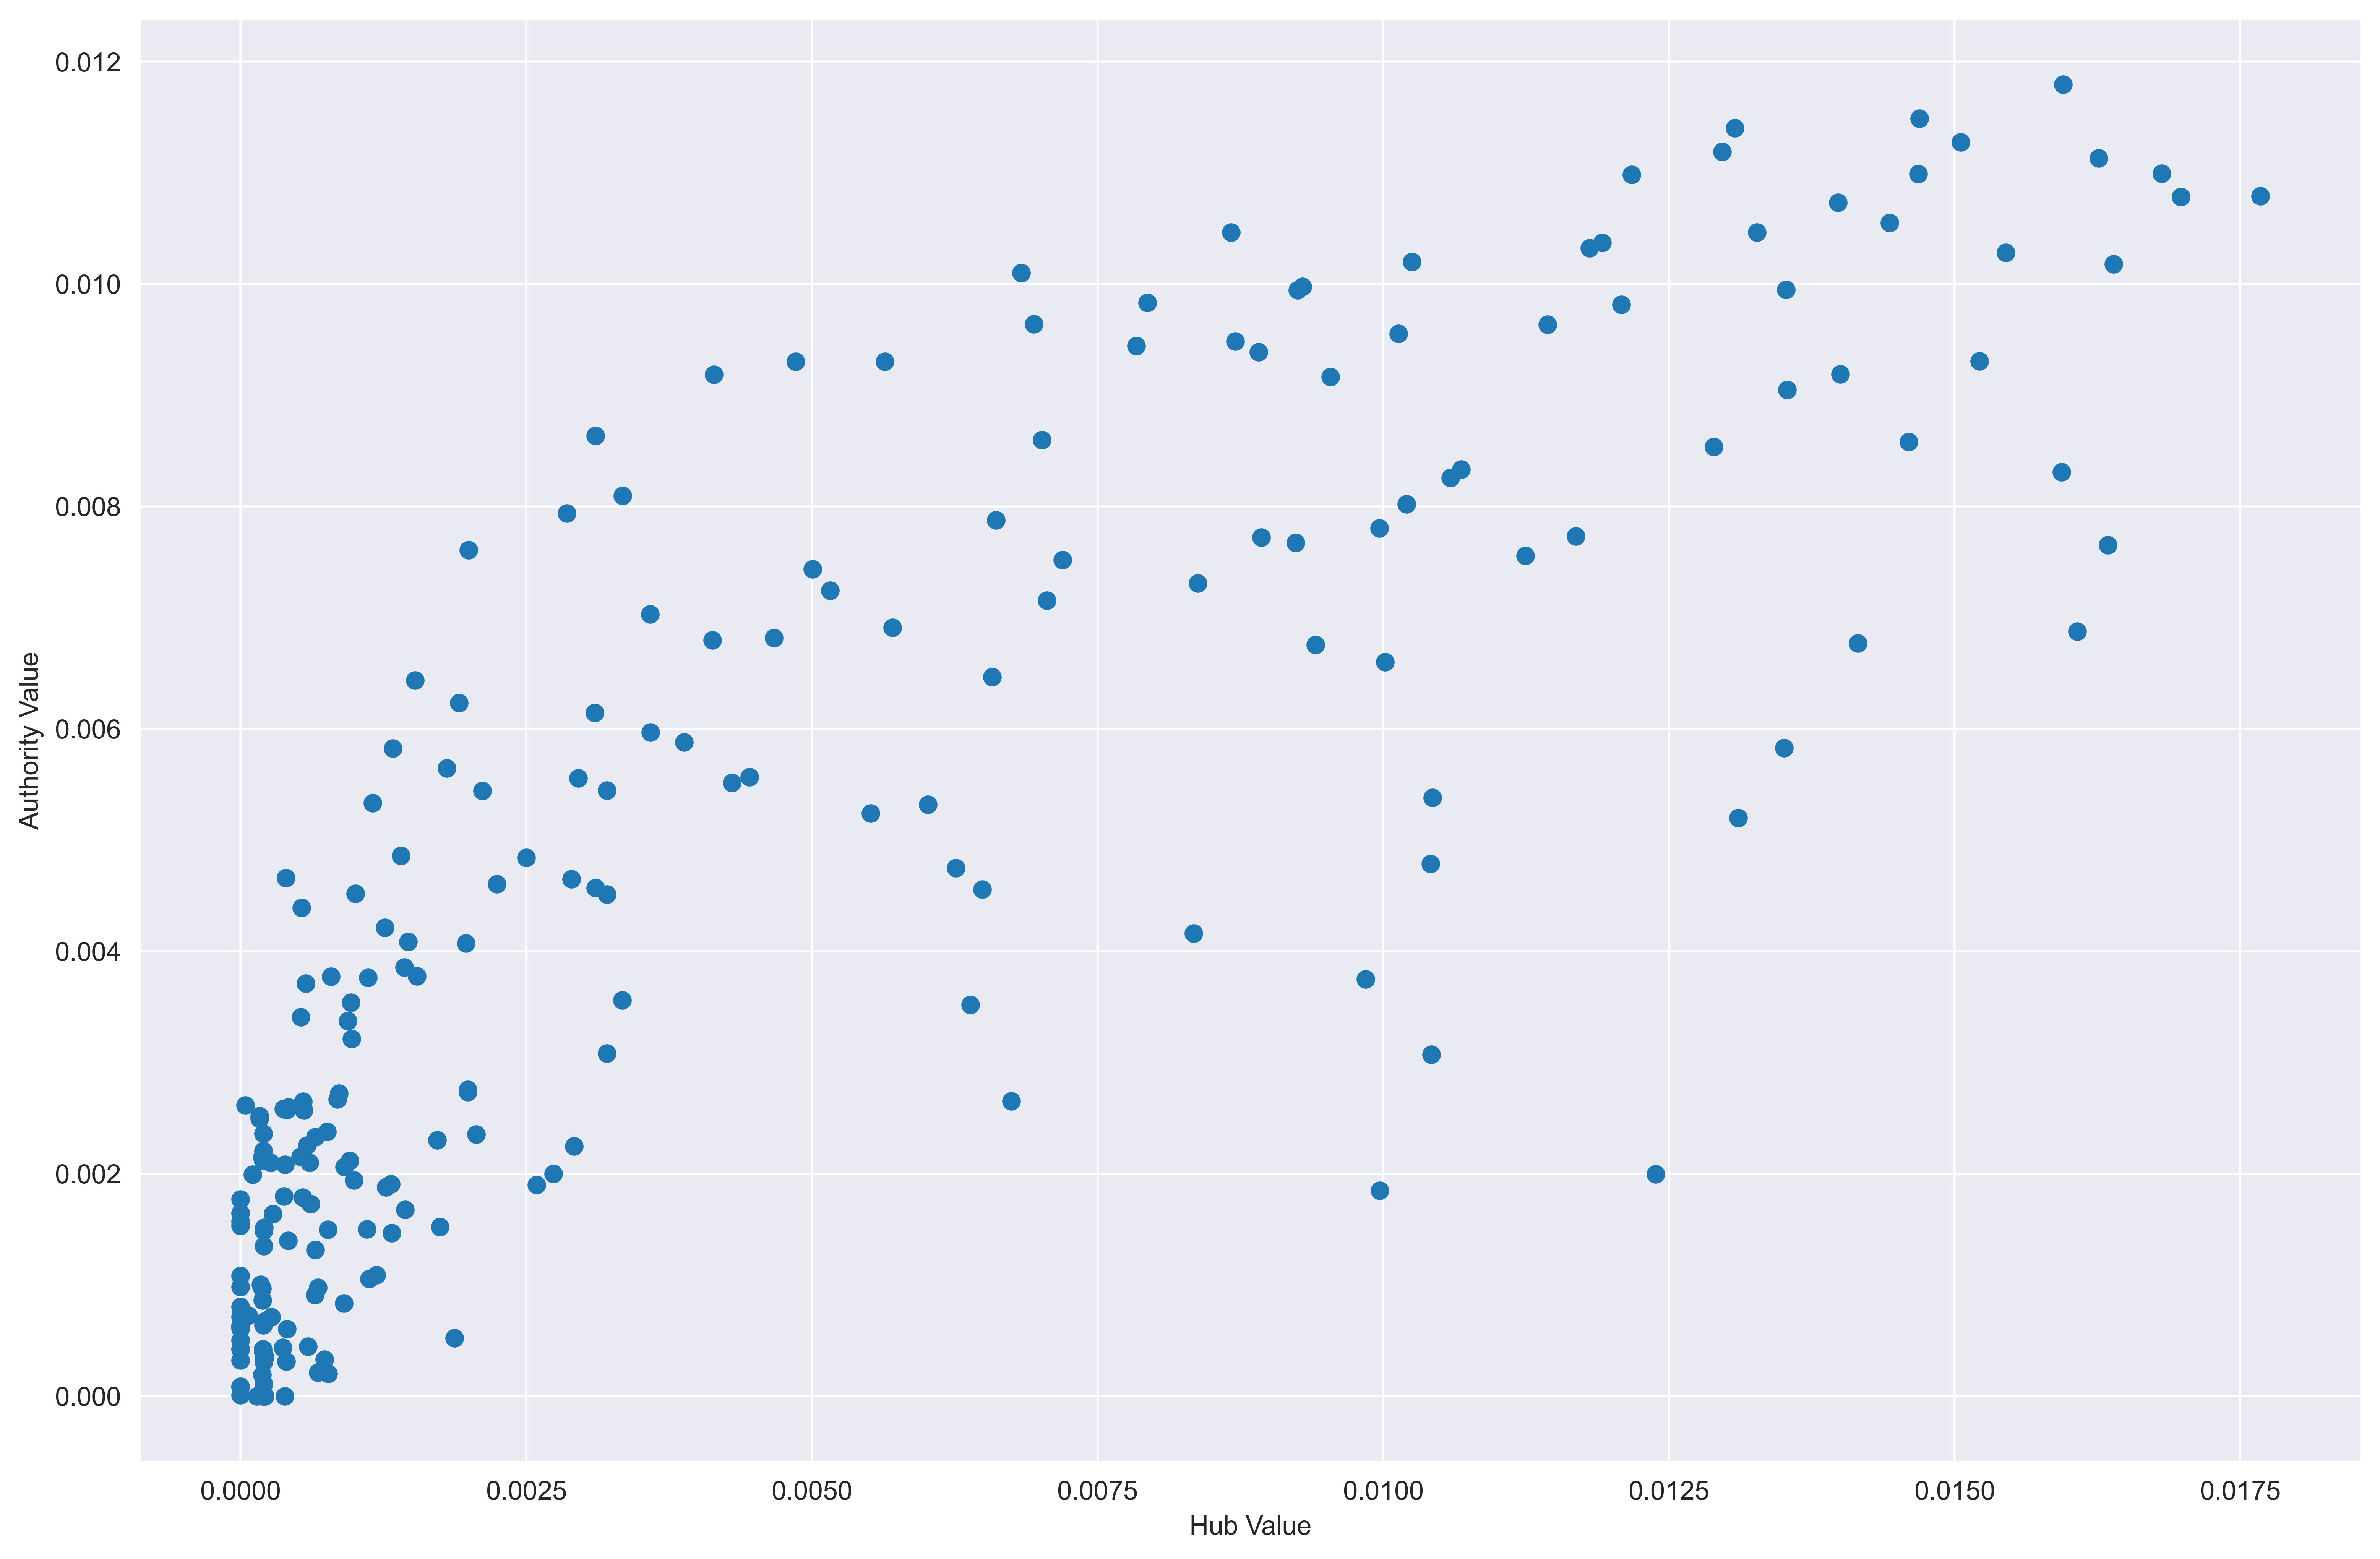

In [53]:
hubs_ftw, auths_ftw = whits(G_ftw) 
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10), dpi=500)
plt.scatter(hubs_ftw.values(), auths_ftw.values())
plt.xlabel("Hub Value")
plt.ylabel("Authority Value")
plt.savefig('figures/footwear_2019_scatter_whits.png', transparent=True)

In [54]:
for node in list(G_ftw.nodes()):
    if node not in ftw_node_size_dict.keys():
        ftw_node_size_dict.update({node:0})

NameError: name 'locations_revised' is not defined

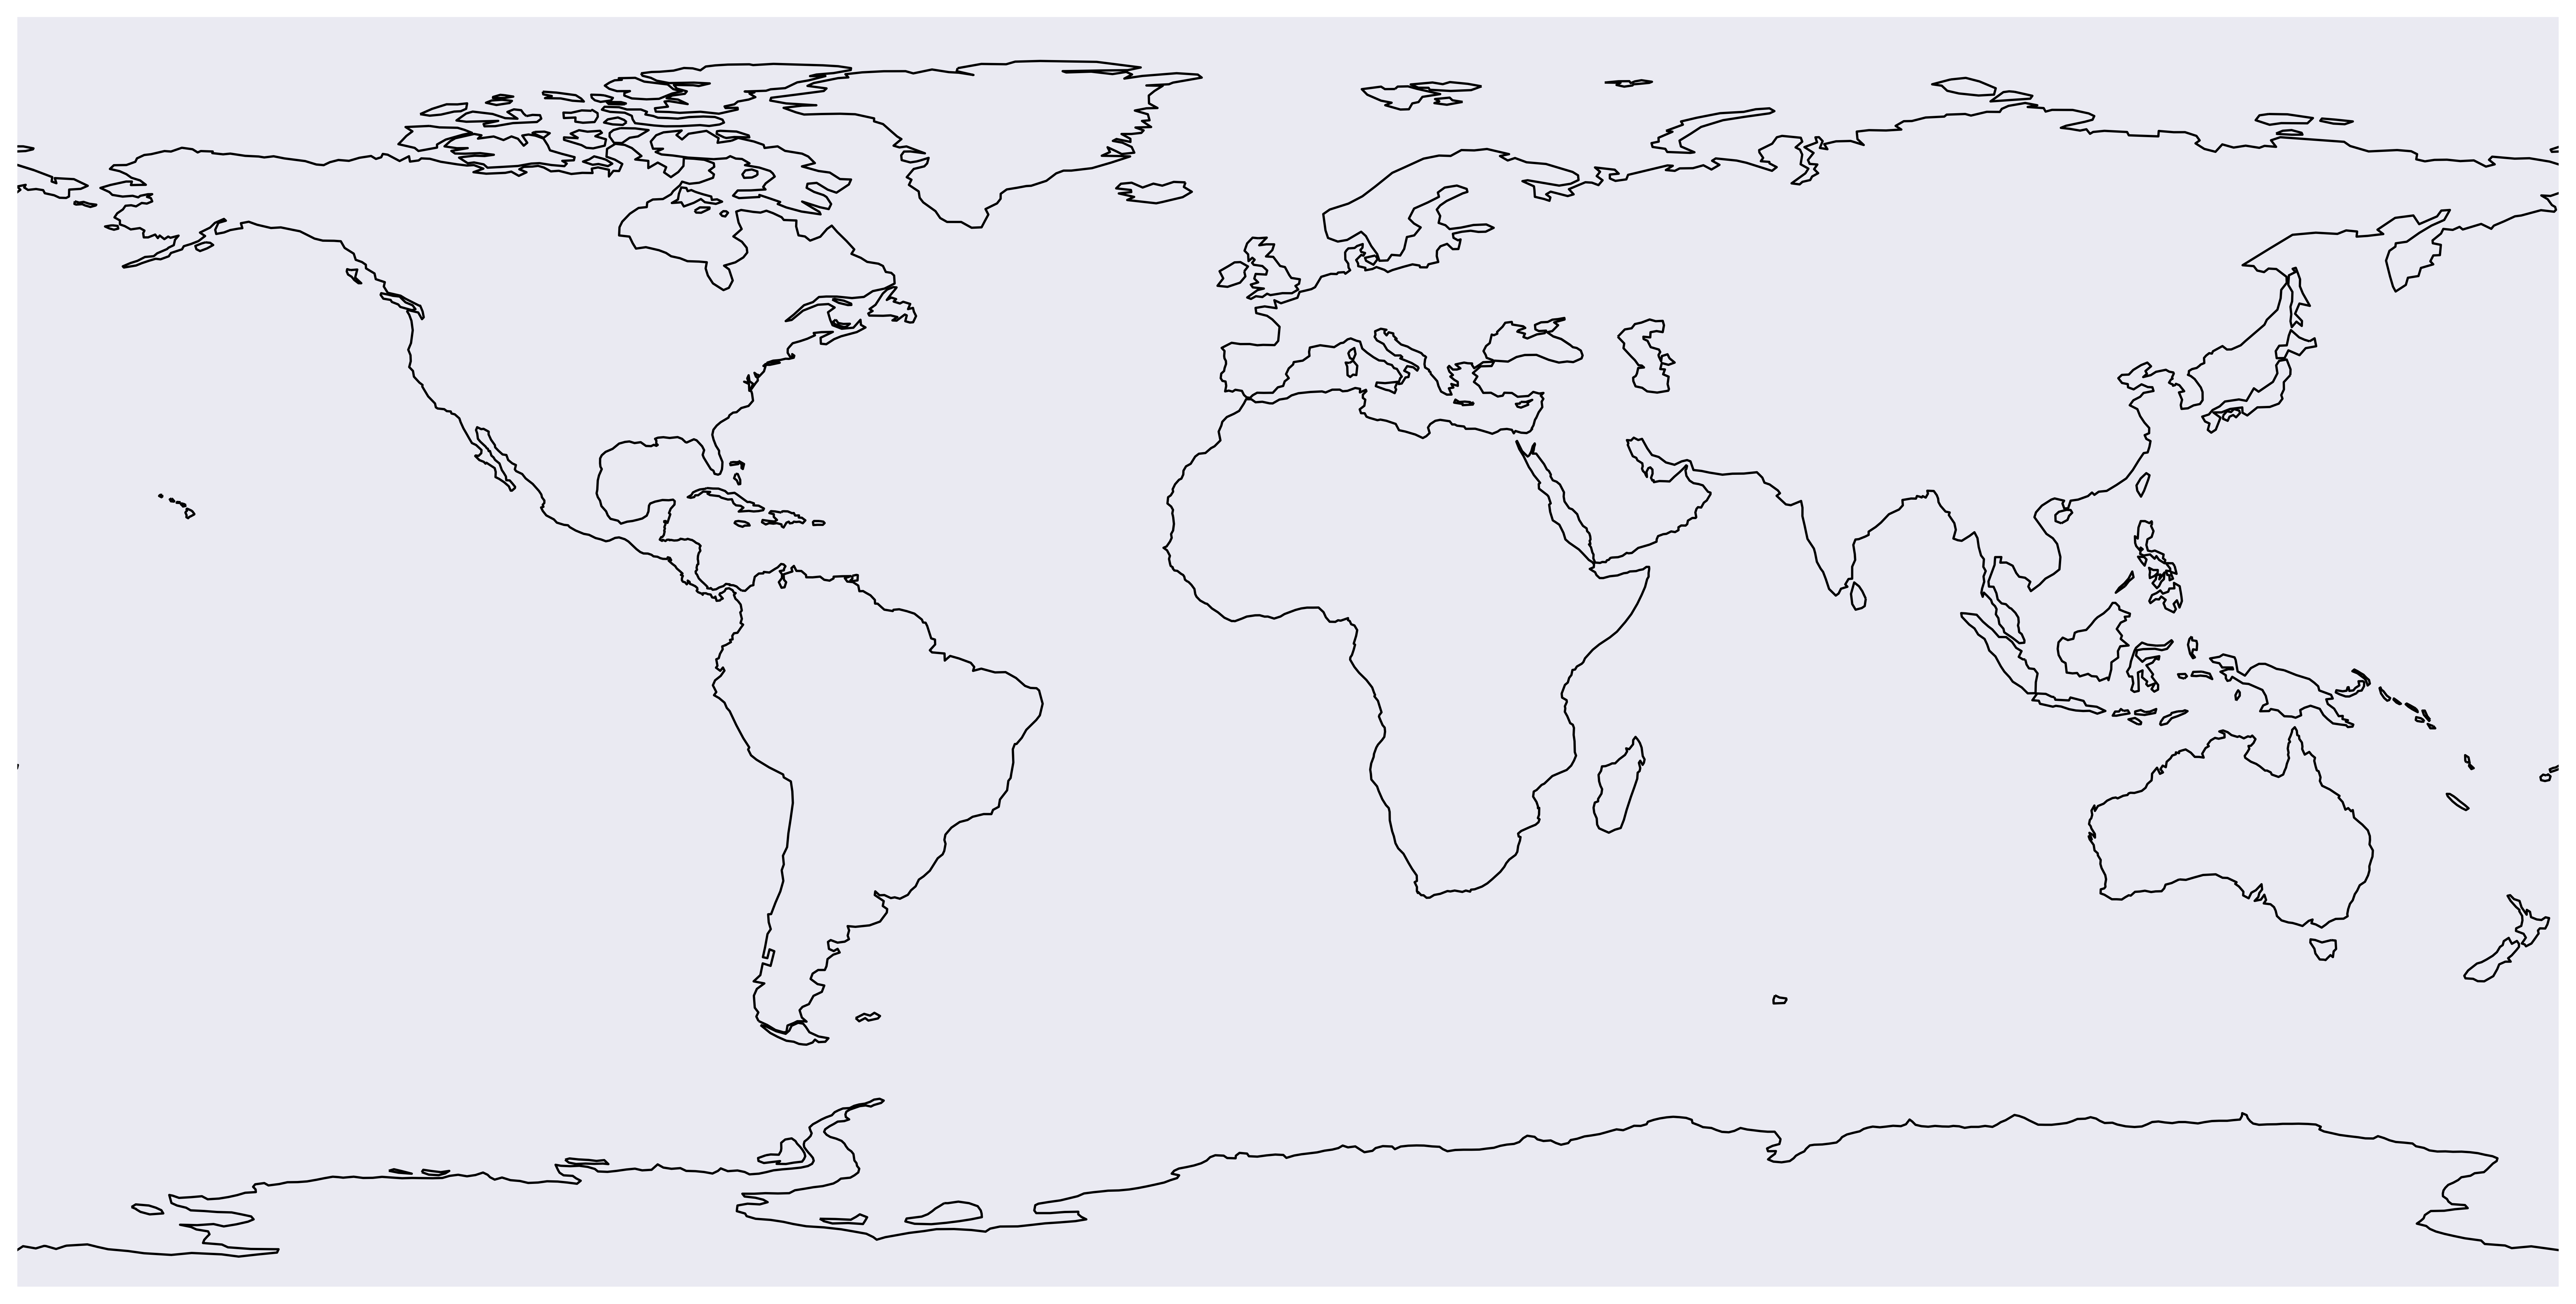

In [55]:
# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, figsize=(20, 15), dpi=500,
                       subplot_kw=dict(projection=crs))
ax.coastlines()
ax.set_global()
nx.draw_networkx(G_ftw, ax=ax,
                 font_size=15,
                 alpha=.75,
                 width=.075,
                 #node_size=list(ftw_node_size_dict.values()),
                 labels=ftw_labels,
                 pos={country:(long, lat) for (country, (lat, long)) in locations_revised.items()},
                 node_color='#096AC5')
plt.savefig('figures/footwear_2019_nx.png', transparent=True)

In [60]:
#########
# TOTAL #
#########

# summarizing total value dataframe
df_tot_value = df_baci_2019[['exp_code', 'imp_code',
              'value_kUSD']].groupby(['exp_code', 'imp_code']).sum()
df_tot_value = df_tot_value.reset_index()
df_tot_value

# creating labels
label_tot_basis_dict = dict(zip(df_tot_value['exp_code'], df_tot_value['value_kUSD']))
tot_labels = {country: country if label_tot_basis_dict[country] >= 1707421.1615999949
              else '' for country in label_tot_basis_dict.keys()}

In [ ]:
G_tot = nx.Graph()
G_tot = nx.from_pandas_edgelist(df_tot_value, 
                            source='exp_code', 
                            target='imp_code',
                            edge_attr=['value_kUSD'],
                            create_using = nx.DiGraph())
pos = nx.circular_layout(G_tot)

In [ ]:
hubs_tot, auths_tot = nx.hits(G_tot) 

In [ ]:
hubs_ftw, auths_ftw = whits(G_tot) 
sns.set_style('darkgrid')
plt.figure(figsize=(15, 10), dpi=500)
plt.scatter(hubs_tot.values(), auths_tot.values())
plt.xlabel("Hub Value")
plt.ylabel("Authority Value")
plt.savefig('figures/total_2019_scatter_whits.png', transparent=True)

In [ ]:
# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, figsize=(20, 15), dpi=500,
                       subplot_kw=dict(projection=crs))
ax.coastlines()
ax.set_global()
nx.draw_networkx(G_tot, ax=ax,
                 font_size=15,
                 alpha=.75,
                 width=.075,
                 #node_size=list(ftw_node_size_dict.values()),
                 labels=tot_labels,
                 pos={country:(long, lat) for (country, (lat, long)) in locations_revised.items()},
                 node_color='#096AC5')
plt.savefig('figures/total_2019_nx.png', transparent=True)

In [ ]:
print("Top Hubs in Total Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(hubs_tot.items(), key=lambda item: item[1], reverse=True)[120:130]}, 
                                              orient='index', 
                                              columns=['Hub Value']))

print("Top Authorities in Total Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(auths_tot.items(), key=lambda item: item[1], reverse=True)[120:130]}, 
                                              orient='index', 
                                              columns=['Hub Value']))

In [ ]:
hubs_tot_hits, auths_tot_hits = nx.hits(G_tot) 

In [ ]:
print("Top Hubs in Total Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(hubs_tot_hits.items(), key=lambda item: item[1], reverse=True)[:10]}, 
                                              orient='index', 
                                              columns=['Hub Value']))

print("Top Authorities in Total Network")
display(pd.DataFrame().from_dict({k: v for k, v in sorted(auths_tot_hits.items(), key=lambda item: item[1], reverse=True)[:10]}, 
                                              orient='index', 
                                              columns=['Hub Value']))

In [ ]:
df_total_trade = df_baci_2019[['exporter', 'importer', 'hscode',
              'value_kUSD','quantity_mtons']].groupby(['exporter', 
                                                       'importer']).sum()
df_tot_trade = df_total_trade.reset_index()
df_tot_trade = df_tot_trade[~(df_tot_trade.importer=='Other Asia, nes') 
                            & ~(df_tot_trade.exporter=='Other Asia, nes')]

In [ ]:
df_exporter = df_tot_trade.groupby('exporter').sum()
df_exporter['proportion_of_world_trade'] = df_exporter.value_kUSD/df_exporter.value_kUSD.sum()
df_exporter = df_exporter.reset_index()

In [ ]:
conditions = [
    (df_exporter['value_kUSD'] <= 50_000_000), # <= USD 50 B
    (df_exporter['value_kUSD'] > 50_000_000) & (df_exporter['value_kUSD'] <= 150_000_000),
    (df_exporter['value_kUSD'] > 150_000_000) & (df_exporter['value_kUSD'] <= 500_000_000),
    (df_exporter['value_kUSD'] > 500_000_000)
    ]

values = ['< USD 50 B', 'USD 50-150 B', 'USD 150-500 B', '> USD 500 B']


df_exporter['value_tier'] = np.select(conditions, values)

# creating node size
df_exporter['size_of_node'] = df_exporter['proportion_of_world_trade']*100000
node_size = dict(zip(df_exporter['exporter'], df_exporter['size_of_node'].apply(int)))

# creating dict of long-lat
from geopy.geocoders import Nominatim
countries_list = df_tot_trade.importer.unique()
long_lat_dict = dict()
for country in countries_list:
    geolocator = Nominatim(user_agent="map_locator")
    location = geolocator.geocode(country)
    if location is not None:
        long_lat_dict[country] = (location.longitude, location.latitude)

# creating labels
label_basis_dict = dict(zip(df_exporter['exporter'], df_exporter['value_tier']))

labels = {country: country if label_basis_dict[country] == '> USD 500 B' else ''
          for country in label_basis_dict.keys()}
labels

In [ ]:
# creating dict of long-lat
from geopy.geocoders import Nominatim
countries_list = df_baci_2019.importer.unique()
long_lat_dict = dict()
for country in countries_list:
    geolocator = Nominatim(user_agent="map_locator")
    location = geolocator.geocode(country)
    if location is not None:
        long_lat_dict[country] = (location.longitude, location.latitude)

In [ ]:
# are we dealing with a one-to-many relationship?
check_rels = []
for country in df_tot_trade.exporter.unique():
    check_rels.append(len(df_tot_trade[df_tot_trade.exporter==country].importer) == df_tot_trade[df_tot_trade.exporter==country].importer.nunique())

set(check_rels)
# yes

In [ ]:
G_tot = nx.Graph()
pos = nx.circular_layout(G_tot)
G_tot = nx.from_pandas_edgelist(df_tot_trade, 
                            source='exporter', 
                            target='importer',
                            edge_attr=['value_kUSD', 'quantity_mtons'],
                            create_using = nx.DiGraph())

In [ ]:
len(list(G_tot.nodes))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
nx.draw_networkx(G_tot, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

In [ ]:
deg = nx.degree(G_tot)
sizes = [5* deg[country] for country in G_tot.nodes]

In [ ]:
len(node_size)

In [ ]:
df_exporter

In [ ]:
# Map projection
crs = ccrs.PlateCarree()
fig, ax = plt.subplots(1, 1, figsize=(20, 15),
                       subplot_kw=dict(projection=crs))
ax.coastlines()
ax.set_global()
nx.draw_networkx(G_tot, ax=ax,
                 font_size=16,
                 alpha=.75,
                 width=.075,
                 node_size=list(node_size.values()),
                 labels=labels,
                 pos=long_lat_dict,
                 cmap=plt.cm.autumn)

In [ ]:
set(df_tot_trade.importer.unique()) == set(df_tot_trade.exporter.unique())

In [ ]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df_baci_2019, 
                            source='exporter', 
                            target='importer',
                            edge_attr=['value_kUSD', 'quantity_mtons',
                                       'hs_chap', 'hs_sec'],
                            create_using = nx.DiGraph())

In [ ]:
plt.figure(figsize=(15,12));
plt.axis("off");
pos = nx.circular_layout(G);
nx.draw_networkx_labels(G, pos);
nx.draw(G, pos = pos, node_size=20);

# EVERYTHING AFTER THIS IS SCRATCH

In [ ]:
file_name = "BACI_HS17_V202102.zip"
with zipfile.ZipFile(file_name, 'r') as myzip:

    myzip.printdir()
    print('Extracting all the files now...')
    myzip.extractall()
    print('Done!')

In [ ]:
baci_files = ['BACI 2017',
              'BACI 2018',
              'BACI 2019']
df_baci_2017 = pd.read_csv('BACI_HS17_Y2017_V202102.csv')
df_baci_2018 = pd.read_csv('BACI_HS17_Y2018_V202102.csv')
df_baci_2019 = pd.read_csv('BACI_HS17_Y2019_V202102.csv')
df_baci_list = [df_baci_2017,
                df_baci_2018,
                df_baci_2019]
for i, j in zip(baci_files, df_baci_list):
    printmd("**i**")
    print("Shape of {0}: {1}\n".format(i, j.shape))
    display(j.head())

## Data Dictionary
|Variable|Description|
|:--|:--|
|`t`|Year|
|`i`|Exporter ISO 3-digit numeric code|
|`j`|Importer ISO 3-digit numeric code|
|`k`|Product category (HS 6-digit code)|
|`v`|Value of the trade flow (in thousands current USD)|
|`q`|Quantity (in metric tons)|

## Setting up the dataset

### Download the following supplementary data

In [ ]:
#!git clone https://github.com/datasets/harmonized-system.git

In [ ]:
# Download Excel file in
# https://unstats.un.org/unsd/tradekb/Knowledgebase/50377/Comtrade-Country-Code-and-Name

In [ ]:
country_codes = pd.read_excel('Comtrade Country Code and ISO list.xlsx')
country_dict = dict(zip(country_codes['Country Code'].apply(str), 
                        country_codes['ISO3-digit Alpha']))
country_dict['490'] = 'Other Asia, nes'

In [ ]:
# import HS code dataset
df_hs = pd.read_csv('harmonized-system/data/harmonized-system.csv')
df_hs_6 = df_hs[['hscode', 'description']]
# transform to dictionary
dict_hs = df_hs_6.set_index('hscode').T.to_dict(orient='index')['description']

In [ ]:
def pre_process_dataset(filepath):
    # read the dataset
    df_hs = pd.read_csv(filepath)
    
    # transform all codes to str
    df_hs['k'] = df_hs['k'].astype('str')
    df_hs['i'] = df_hs['i'].astype('str')
    df_hs['j'] = df_hs['j'].astype('str')
    # there are some HS codes that start with 0, 
    # so we add those back to make 6 digits
    df_hs['k'] = df_hs.k.apply(lambda s: '0' + s if len(s) == 5 else s)
    # map dictionary of HS codes to the df
    df_hs['description'] = df_hs['k'].map(dict_hs,
                                          na_action=np.nan)
    df_hs['exporter'] = df_hs['i'].apply(str).map(country_dict,
                                                  na_action=np.nan)
    df_hs['importer'] = df_hs['j'].apply(str).map(country_dict,
                                                  na_action=np.nan)
    return df_hs

In [ ]:
df_baci_2017 = pre_process_dataset('BACI_HS17_Y2017_V202102.csv')
df_baci_2018 = pre_process_dataset('BACI_HS17_Y2018_V202102.csv')
df_baci_2019 = pre_process_dataset('BACI_HS17_Y2019_V202102.csv')

In [ ]:
df_baci_2019[df_baci_2019.exporter.isna()==True].i.unique()

In [ ]:
# ayusin ko later
df_baci_2017[df_baci_2017.description.isna()==True].k.nunique()

### Adding description of HS codes

### Adding importer and exporter country names

In [ ]:
with request.urlopen('https://comtrade.un.org/data/cache/reporterAreas.json') as response_1:
    source = response_1.read()
    countries_json = json.loads(source)

In [ ]:
countries_dict = countries_json['results']
list_of_ids = []
list_of_countries = []
for line in countries_dict:
    list_of_ids.append(line['id'])
    list_of_countries.append(line['text'])
country_dict_1 = dict(zip(list_of_ids, list_of_countries))

In [ ]:
country_dict_1['490']

In [ ]:
df_baci_2019['exporter'] = df_baci_2019['i'].apply(str).map(country_dict_1,
                                                            na_action=np.nan)
df_baci_2019['importer'] = df_baci_2019['j'].apply(str).map(country_dict_1,
                                                            na_action=np.nan)

In [ ]:
df_test = df_baci_2019[df_baci_2019.description=='Meat and edible meat offal; salted, in brine, dried or smoked, and edible flours and meals of meat or meat offal, of reptiles (including snakes and turtles)']

In [ ]:
df_baci_2019.description.value_counts().tail(50)

In [ ]:
G = nx.Graph()
G = nx.from_pandas_edgelist(df_test, source='exporter', target='importer',
                           edge_attr=['v', 'q'])

In [ ]:
plt.figure(figsize=(15,12));
plt.axis("off");
pos = nx.circular_layout(G);
nx.draw_networkx_labels(G, pos);
nx.draw(G, pos = pos, node_size=20);

In [ ]:
df_baci_2019['trade'] = list(zip(df_baci_2019['exporter'], df_baci_2019['importer']))

In [ ]:
df_baci_2019[(df_baci_2019.importer=='Philippines')&(df_baci_2019.description=='Machines and mechanical appliances; parts, of those having individual functions')]

In [ ]:
len(df_baci_2019['trade'].unique())

In [ ]:
df_baci_2019.groupby(['description']).sum()[['v', 'q']]